In [1]:
from rdkit import Chem
import numpy as np
import pandas as pd
from IPython.display import display

# Load simulator data

In [2]:
dataset = pd.read_csv("/home/abhor/Desktop/datasets/my_uspto/simulator_dataset.csv", index_col=0)

In [3]:
dataset

,reactants,products,rsig,psig,rcen,pcen
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],[2],[3]
1,O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],[ClH:7],[CH3:0][NH2:1],[7],[1]
2,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc21,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)cc21,NaN,[CH2:20]=[O:21],[],[20]
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)c1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,[OH2:26],[NH2:26][c:27]1[cH:28][n:29][c:30]([CH3:31])[c...,[26],[26]
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,[ClH:5],[NH2:5][CH2:6][c:7]1[cH:8][cH:9][c:10]([Cl:11]...,[5],[5]
...,...,...,...,...,...,...
448504,CCP(CC)CC,CCCCOS(=O)(=O)[O-],[PH:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O-:8],[2],[2]
448505,CCCCOS(=O)(=O)OCCCC,CCCC[P+](CC)(CC)CC,[OH:4][S:5](=[O:6])(=[O:7])[O:8][CH2:9][CH2:10...,[P+:4]([CH2:5][CH3:6])([CH2:7][CH3:8])[CH2:9][...,[4],[4]
448506,Cc1cccc(C)c1N=C1NCCN1OCc1ccccn1,Cc1cccc(C)c1N=C1NCCN1O,[CH3:15][c:16]1[cH:17][cH:18][cH:19][cH:20][n:...,NaN,[15],[]
448507,Clc1ccnc(Cl)c1,N[n+]1ccc(Cl)cc1Cl,NaN,[NH3:0],[],[0]


# Filtering dataset

In [5]:
# First we remove those reactions where the signature extraction didnt work properly 
# In these cases, the Chem.Mol of either of rsig or psig is None
rsig_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["rsig"].tolist())))
psig_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["psig"].tolist())))

dataset = dataset[rsig_worked & psig_worked]
print(dataset.shape)

(438686, 6)


In [6]:
# we only consider actions from the following reactions: 
# 1. len(rcen) == len(pcen)
# 2. len(rcen) != 0. len(pcen) == 0 is allowed. = 0 means Hydrogen, so we do not want Hydrogen removals because
#    there are too many options in that case. Adding a Hydrogen is fine since that is deterministic.
# 3. len(rcen) <= 2 and len(pcen) <= 2. The cases where this is not true is typically because the 
#    reactant-product mapping is wrong. These cases are few anyways so it's fine.
rlen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["rcen"])))
plen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["pcen"])))
# dataset = dataset[(rlen==plen) & (rlen!=0) & (rlen<=2) & (pcen<=2)]
# dataset

dataset[(rlen==plen) & (rlen!=0)]

,reactants,products,rsig,psig,rcen,pcen
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],[2],[3]
1,O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],[ClH:7],[CH3:0][NH2:1],[7],[1]
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)c1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,[OH2:26],[NH2:26][c:27]1[cH:28][n:29][c:30]([CH3:31])[c...,[26],[26]
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,[ClH:5],[NH2:5][CH2:6][c:7]1[cH:8][cH:9][c:10]([Cl:11]...,[5],[5]
6,O=C(N1CCc2ccc(Cl)c(OS(=O)(=O)C(F)(F)F)c2CC1)C(...,CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc(F...,[OH:11][S:12](=[O:13])(=[O:14])[C:15]([F:16])(...,[CH3:0][CH:1]([NH2:2])[c:21]1[cH:22][cH:23][c:...,[11],[2]
...,...,...,...,...,...,...
448499,CC(C)(C)c1nc2cc(S(=O)(=O)Cl)ccc2n1CC1CCC(F)(F)CC1,CC(C)(C)c1nc2cc(S(=O)(=O)N3CCC(C(=O)NC4CC4)C3)...,[ClH:12],[NH:12]1[CH2:13][CH2:14][CH:15]([C:16](=[O:17]...,[12],[12]
448501,COC(=O)c1ccc(-n2cnc3cc(C#N)ccc32)cc1,N#Cc1ccc2c(c1)ncn2-c1ccc(C(=O)N2CCC(N3CCCC3)C2...,[CH3:0][OH:1],[NH:17]1[CH2:18][CH2:19][CH:20]([N:21]2[CH2:22...,[1],[17]
448502,O=C(Cl)OCC(Cl)(Cl)Cl,O=C(O)OCC(Cl)(Cl)Cl,[ClH:2],[OH2:2],[2],[2]
448504,CCP(CC)CC,CCCCOS(=O)(=O)[O-],[PH:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O-:8],[2],[2]


In [7]:
rplen = list(map(lambda x: f"{x[0]}-{x[1]}", zip(rlen, plen)))

In [8]:
np.unique(rplen, return_counts=True)

(array(['0-0', '0-1', '0-2', '0-3', '0-4', '0-5', '0-6', '0-7', '1-0',
        '1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '2-0', '2-1',
        '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-0', '3-1', '3-2',
        '3-3', '3-4', '3-5', '3-6', '4-0', '4-1', '4-2', '4-3', '4-4',
        '4-5', '4-6', '5-0', '5-1', '5-2', '5-3', '5-4', '5-5', '6-1',
        '6-3', '7-1', '7-3', '9-1'], dtype='<U3'),
 array([  3620, 138434,   2686,    442,     38,      6,      1,      1,
         73905, 181613,  11562,    640,    171,     28,      5,      2,
         16741,   5489,   1662,    168,     69,     23,      4,      1,
           380,    440,    199,     86,     43,      4,      1,     12,
            54,     63,     22,     21,      5,      1,      1,      7,
            11,     14,      3,      1,      1,      3,      1,      1,
             1]))

In [26]:
dataset.shape

(438686, 6)

In [46]:
temp = dataset[(rlen>=3) | (plen>=3)]
print(temp.shape)

(2974, 6)


In [45]:
temp = dataset[(rlen==2) & (plen==2)]
print(temp.shape)

(1662, 6)


In [47]:
temp = dataset[(rlen<=1) & (plen<=1)]
print(temp.shape)

(397572, 6)


In [49]:
temp = dataset[(rlen==2) ^ (plen==2)]
print(temp.shape)

(37016, 6)


In [51]:
438686 - (2974 + 1662 + 397572 + 37016)

-538

In [20]:
temp

,reactants,products,rsig,psig,rcen,pcen
42,CCOC(=O)c1cc(-c2ccccc2)n(S(=O)(=O)c2ccccc2)c1Cl,O=S(=O)(c1ccccc1)n1c(-c2ccccc2)cc(CO)c1Cl,[CH3:0][CH3:1].[OH2:4],NaN,"[1, 4]",[]
71,O=Cc1cnc(Br)s1,CC(O)c1cnc(Br)s1,[OH2:0],[CH4:0].[OH2:2],[0],"[0, 2]"
73,CCOC(=O)C(Cc1ccc(C#N)cc1)(NC(C)=O)C(=O)OCC,CCOC(=O)C(Cc1ccc(C(N)=S)cc1)(NC(C)=O)C(=O)OCC,[NH3:12],[NH3:12].[SH2:13],[12],"[12, 13]"
74,C=CCCC(O)(CCC=C)c1cccc(F)c1F,OC1(c2cccc(F)c2F)CCC=CCC1,[CH4:0].[CH4:9],NaN,"[0, 9]",[]
78,NC(=O)C1CCCN(CC2COc3ccccc3O2)C1,N#CC1CCCN(CC2COc3ccccc3O2)C1,[NH3:0].[OH2:2],[NH3:0],"[0, 2]",[0]
...,...,...,...,...,...,...
448430,O=C(O)C(F)(F)F,O=C1C[NH2+]CCN1Cc1ccc(F)cc1,[FH:4].[FH:5].[FH:6].[OH2:2],[NH2+:3][CH2:4][CH2:5][NH:6][CH2:7][c:8]1[cH:9...,"[2, 4, 5, 6]","[3, 6]"
448434,Nc1ccccc1O,Cc1ccc(S(=O)(=O)O)cc1,[NH3:0].[OH2:7],[CH4:0].[SH:5](=[O:6])(=[O:7])[OH:8],"[0, 7]","[0, 5]"
448444,S=C(Cl)Cl,[N-]=C=S,[ClH:2].[ClH:3],[N-:0],"[2, 3]",[0]
448468,C1CCOC1,CC(C)(C)[NH-],[OH:3][CH3:4],[CH4:3].[NH-:4],"[3, 4]","[3, 4]"


In [31]:
i = -1

reactants    COc1cccc(C2=NCCC2)c1
products      COc1cccc(C2CCCN2)c1
rsig                          NaN
psig                          NaN
rcen                           []
pcen                           []
Name: 1048, dtype: object
Reactant


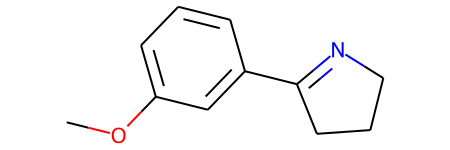

Product


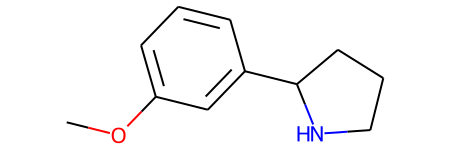

Reactant subgroup


TypeError: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type float

In [44]:
i+=1
print(temp.iloc[i])
print("Reactant")
display(Chem.MolFromSmiles(temp.iloc[i]["reactants"]))
print("Product")
display(Chem.MolFromSmiles(temp.iloc[i]["products"]))
print("Reactant subgroup")
display(Chem.MolFromSmiles(temp.iloc[i]["rsig"]))
print("Product subgroup")
display(Chem.MolFromSmiles(temp.iloc[i]["psig"]))

In [368]:
x = Chem.MolFromSmiles(temp.iloc[i]["psig"])

In [377]:
print(x)

None
